<a href="https://colab.research.google.com/github/ysun155/Math140/blob/main/week2%20exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 7:
You have acquired the following sample set:
$$
w=\left\{
  \begin{pmatrix} -1 \\ -2 \end{pmatrix},
  \begin{pmatrix} 1 \\ 3 \end{pmatrix},
  \begin{pmatrix} 0 \\ 1 \end{pmatrix},
  \begin{pmatrix} 2 \\ 0.5 \end{pmatrix}
  \right\}
$$
Perform PCA (principal component analysis) on w and draw a graph containing the samples, principal components and the projected samples.

#Step by step calculation

In [38]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import dot
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [39]:
# define a matrix
A = array([[-1, -2], [1, 3], [0, 1], [2,0.5]])
print(A)

[[-1.  -2. ]
 [ 1.   3. ]
 [ 0.   1. ]
 [ 2.   0.5]]


In [40]:
# calculate the mean of each column
M = mean(A, axis=0)
print(M)

[0.5   0.625]


In [41]:
# center columns by subtracting column means
C = A - M
print(C)

[[-1.5   -2.625]
 [ 0.5    2.375]
 [-0.5    0.375]
 [ 1.5   -0.125]]


In [42]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[1.66666667 1.58333333]
 [1.58333333 4.22916667]]


In [43]:
# eigenvalues and eigenvectors of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[-0.90251069 -0.43066745]
 [ 0.43066745 -0.90251069]]
[0.91111869 4.98471465]


In [ ]:
# project data
P = dot(vectors.T, C.T)
print(P.T)

[[ 0.22326398  3.01509174]
 [ 0.57157985 -2.35879662]
 [ 0.61275564 -0.12310778]
 [-1.40759947 -0.53318734]]


#Calculation with sklearn.decomposition

In [ ]:
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
A = array([[-1, -2], [1, 3], [0, 1], [2,0.5]])
print('original data:')
print(A)

# create the PCA instance
pca = PCA(1)
# fit on data
pca.fit(A)

# access values and vectors
print('principal components:')
print(pca.components_)
print('explained variance:')
print(pca.explained_variance_)

# transform data
B = pca.transform(A)
print('projected data:')
print(B)

original data:
[[-1.  -2. ]
 [ 1.   3. ]
 [ 0.   1. ]
 [ 2.   0.5]]
principal components:
[[-0.43066745 -0.90251069]]
explained variance:
[4.98471465]
projected data:
[[ 3.01509174]
 [-2.35879662]
 [-0.12310778]
 [-0.53318734]]


#Visualization

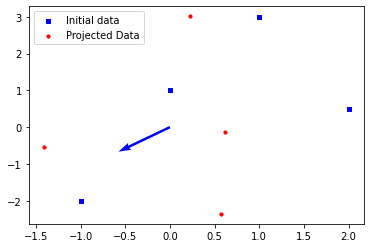

In [ ]:
#find lines of best fit
pa, pb = np.polyfit(P.T[:,0], P.T[:,1], 1)
a, b = np.polyfit(A[:,0], A[:,1], 1)

# Plot everything
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(A[:,0], A[:,1], s=10, c='blue', marker="s", label='Initial data')
# plt.plot(A[:,0], a*A[:,0]+b, color='blue', linestyle='--', linewidth=2)

ax1.scatter(P.T[:,0],P.T[:,1], s=10, c='r', marker="o", label='Projected Data')
# plt.plot(P.T[:,0], pa*P.T[:,0]+pb, color='r', linestyle='--', linewidth=2)

# Vector origin location
X = [0]
Y = [0]
# Directional vectors
U = pca.components_[0][1]
V = pca.components_[0][0]
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)

plt.legend(loc='upper left');
# plt.title("")
plt.show()